<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/04_Implementation_Perspective_of_Handling_Non_linearly_Separable_Data_(e_g_%2C_XOR_Problem).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04 Implementation: Perspective of Handling Non-linearly Separable Data (e.g., XOR Problem)

## Step 1: Choose a Non-linearly Separable Dataset


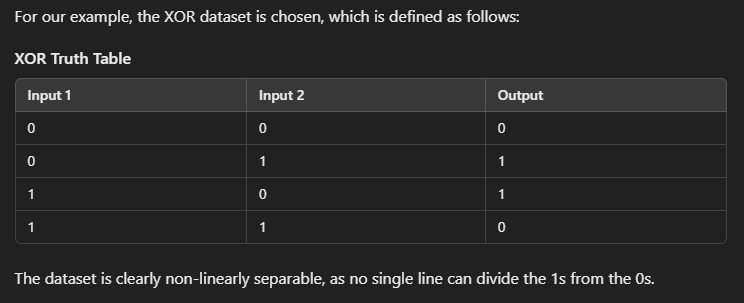

## Step 2: Define the Perceptron and Initialize Weights and Bias


In [1]:
# Perceptron Initialization

import numpy as np

# Inputs (X) and Outputs (y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize weights and bias to small random values
weights = np.random.rand(2)
bias = np.random.rand(1)


## Step 3: Train the Perceptron


In [2]:
# Training Process

# Learning rate
learning_rate = 0.1

# Step function
def step_function(x):
    return 1 if x > 0 else 0

# Training the perceptron for a number of epochs
def train_perceptron(X, y, weights, bias, epochs=100):
    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            output = step_function(np.dot(X[i], weights) + bias)
            error = y[i] - output
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            total_error += abs(error)
        if total_error == 0:
            break
    return weights, bias

weights, bias = train_perceptron(X, y, weights, bias)


## Step 4: Introduce the Limitation of the Perceptron with Non-linearly Separable Data


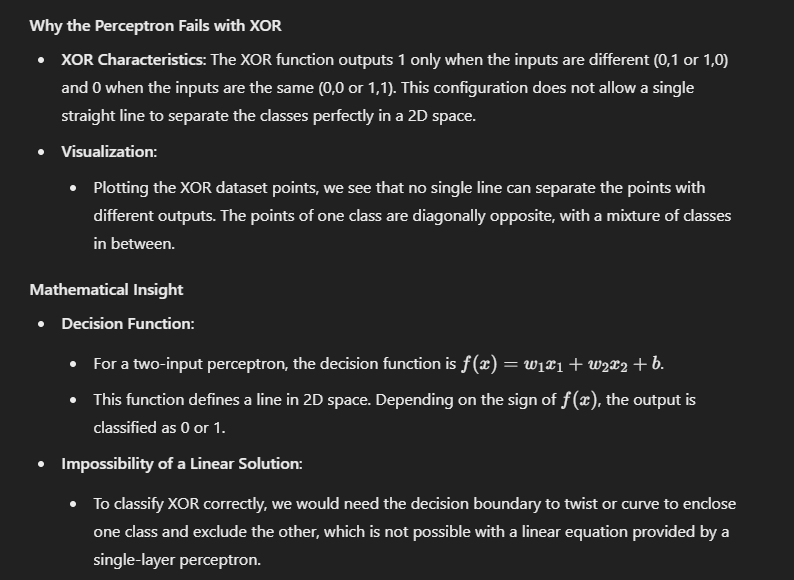

#### Empirical Observation

Experiment: Training a perceptron on the XOR data will show that the weights and bias continue to update indefinitely without convergence. This is because, after each epoch, there is always at least one misclassified point that prompts the perceptron to adjust its parameters.


In [4]:
# Assume weights, bias, and other parameters are initialized as shown in previous examples

# Training function with a modification to count epochs
def train_perceptron(X, y, weights, bias, epochs=10):
    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            output = step_function(np.dot(X[i], weights) + bias)
            error = y[i] - output
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            total_error += abs(error)
        if total_error == 0:
            print("Perceptron has converged at epoch:", epoch)
            return weights, bias
        print("Epoch:", epoch, "Total Error:", total_error)
    return weights, bias

weights, bias = train_perceptron(X, y, weights, bias)


Epoch: 0 Total Error: 4
Epoch: 1 Total Error: 4
Epoch: 2 Total Error: 4
Epoch: 3 Total Error: 4
Epoch: 4 Total Error: 4
Epoch: 5 Total Error: 4
Epoch: 6 Total Error: 4
Epoch: 7 Total Error: 4
Epoch: 8 Total Error: 4
Epoch: 9 Total Error: 4


Running the above training function typically results in an "Epoch" count that reaches the maximum without convergence, indicating a continual adjustment of weights and bias without finding a satisfactory line of separation.


**Note: So Plotting wont't be possible**

## Step 5: Compare with a Multi-layer Perceptron (MLP)


 - We found that when perceptron can fail. So, the limitations of a single-layer perceptron in solving non-linear problems like the XOR problem.

 - Here, we do the demonstrate the capability of MLPs, which include one or more hidden layers with non-linear activation functions, to successfully classify non-linearly separable data.


- To perform this comparison, we need both models trained on the same dataset:

  - Perceptron: Already observed to fail in classifying XOR during its training process.

  - MLP: Configured with non-linear activation functions in hidden layers.

#### Implementing the MLP


In [9]:
# MLP Implementation using Keras

from keras.models import Sequential
from keras.layers import Dense

# Initialize the MLP
model = Sequential()

# Adding the hidden layer with non-linear activation function (ReLU)
model.add(Dense(units=2, input_dim=2, activation='relu'))

# Adding the output layer with sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model with binary cross-entropy loss and adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
# Training the model on XOR data
model.fit(X, y, epochs=1000, verbose=0)


In [11]:
# Evaluating the model to get accuracy
accuracy = model.evaluate(X, y, verbose=0)[1]
print(f"MLP accuracy on XOR problem: {accuracy:.2f}")


MLP accuracy on XOR problem: 0.75


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


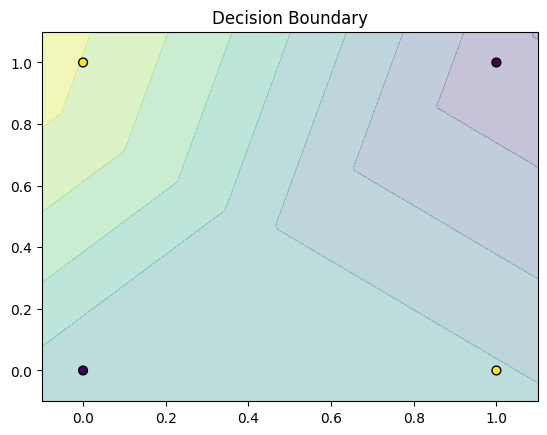

In [12]:
# Visualizing Decision Boundaries

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(model, X, y)


#### Explanation:

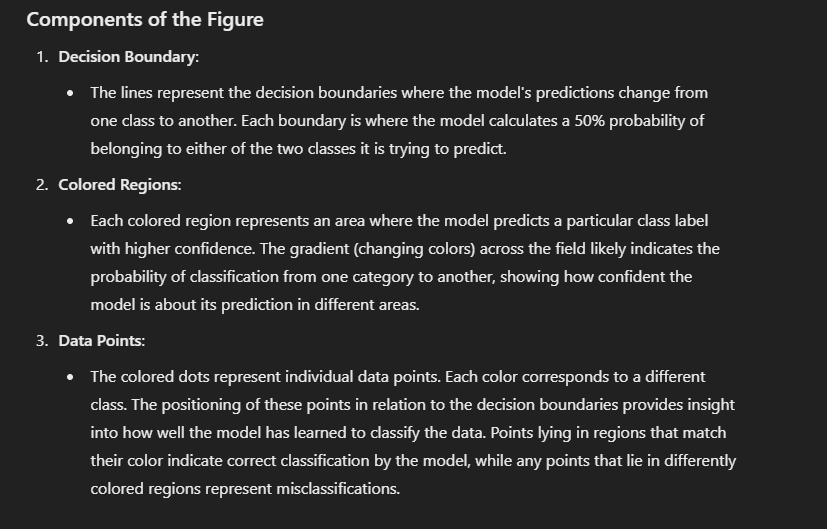

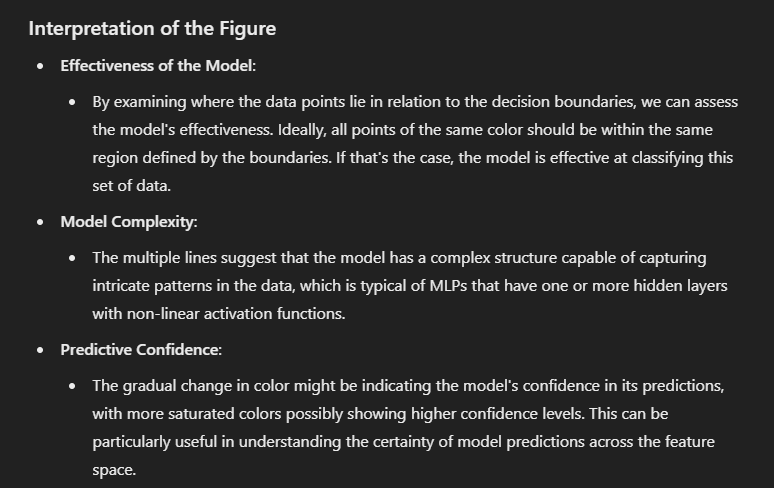

## Observations

### Difference between linear and non-linear relationships in neural networks (NN)

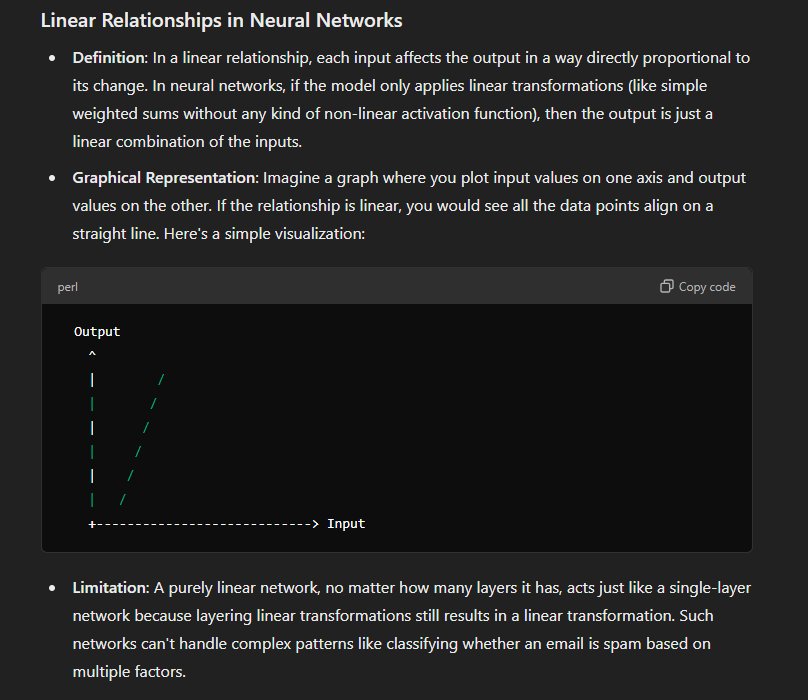

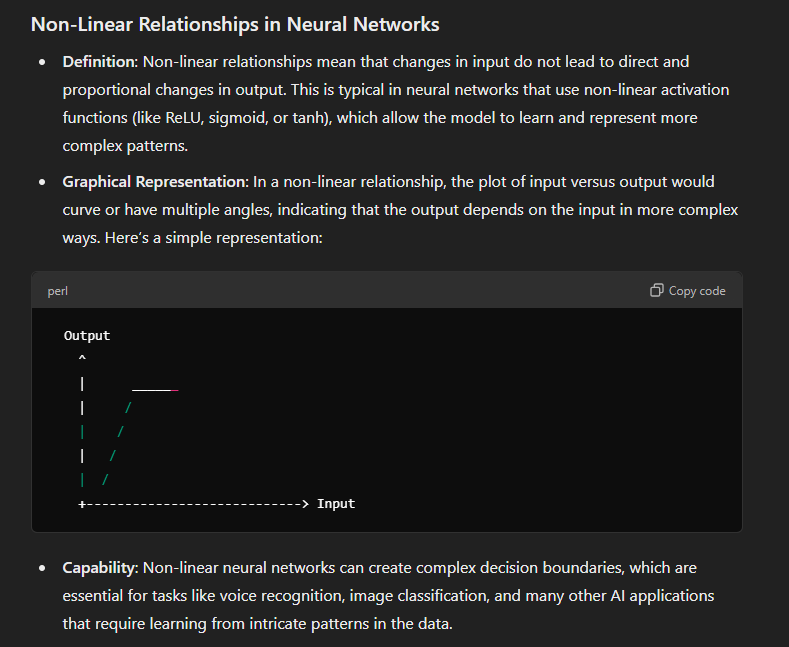

**Example Code:**

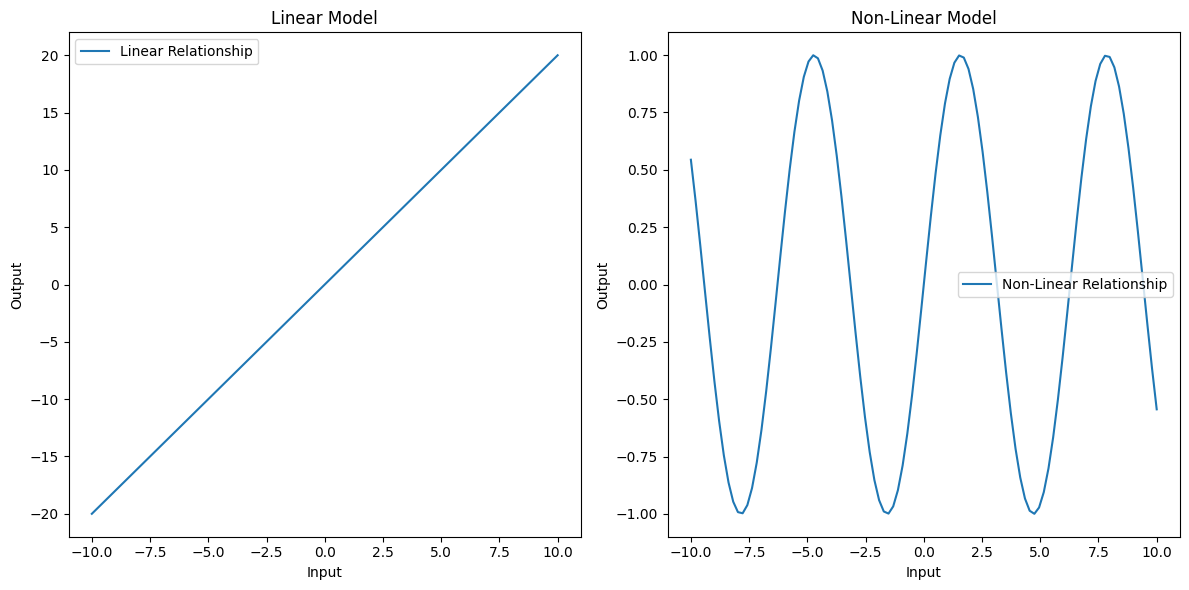

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Linear model: y = 2x
x = np.linspace(-10, 10, 100)
y_linear = 2 * x

# Non-linear model: y = sin(x)
y_nonlinear = np.sin(x)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y_linear, label='Linear Relationship')
plt.title('Linear Model')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y_nonlinear, label='Non-Linear Relationship')
plt.title('Non-Linear Model')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

plt.tight_layout()
plt.show()
